## Individuals interested in data analyst salaries will find this analysis useful. The dataset for this analysis was scraped by an individual from the popular job website, Glassdoor. The analysis will identify “in-demand” sectors and provide a quantifiable range of average salary differences from sector to sector. The three most popular sectors are analyzed: Information Technology (IT), Business Services, and Finance. Three statistical tests will be performed:
1. T-test of average salaries for IT DA jobs vs Business Services DA jobs
2. T-test of average salaries for IT DA jobs vs Finance DA jobs
3. T-test of average salaries for Business Services DA jobs vs Finance DA jobs

Hypotheses for T-Tests:
1.	A significant difference will be observed for average salaries of IT DA jobs vs Business Services DA jobs
2.	A significant difference will be observed for average salaries of IT DA jobs vs Finance DA jobs
3.	A significant difference will be observed for average salaries of Business Services DA jobs vs Finance DA jobs

Note: Salaries are listed as thousands of United States dollars (USD), unless otherwise specified.

**Mount Google Drive to Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import pandas, scipy, seaborn, math libraries to use for dataset analysis and read dataset**

In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
import math

path = '/content/drive/MyDrive/Thinkful Data Analytics - Capstone III/DataAnalyst.csv'
df = pd.read_csv(path)

**Begin to analyze dataset attributes**

Dataset has 2253 rows, 16 columns

In [ ]:
df.shape

(2253, 16)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [ ]:
locations = df['Location'].value_counts()
print(locations)

New York, NY             310
Chicago, IL              130
San Francisco, CA        119
Austin, TX                81
Los Angeles, CA           80
                        ... 
Maywood, IL                1
Sandy, UT                  1
Ridley Park, PA            1
Arlington Heights, IL      1
Millbrae, CA               1
Name: Location, Length: 253, dtype: int64
<bound method IndexOpsMixin.nunique of New York, NY             310
Chicago, IL              130
San Francisco, CA        119
Austin, TX                81
Los Angeles, CA           80
                        ... 
Maywood, IL                1
Sandy, UT                  1
Ridley Park, PA            1
Arlington Heights, IL      1
Millbrae, CA               1
Name: Location, Length: 253, dtype: int64>


Find number of unique job descriptions: 2253. DataFrame does not appear to have any duplicates.

In [ ]:
df['Job Description'].nunique()

2253

Display ownership types

In [ ]:
ownership = df['Type of ownership'].value_counts()
print(ownership)

Company - Private                 1273
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
Private Practice / Firm              9
School / School District             9
Franchise                            2
Self-employed                        2
Name: Type of ownership, dtype: int64


Display industry types; there are 353 nulls (-1) for industy type (approx. 15% of dataset), will ***not*** pursue industry attribute in analysis any further as nulls make up the largest industry

In [ ]:
industry = df['Industry'].value_counts()
print(industry)

-1                                  353
IT Services                         325
Staffing & Outsourcing              323
Health Care Services & Hospitals    151
Consulting                          111
                                   ... 
Trucking                              1
Sporting Goods Stores                 1
Express Delivery Services             1
Audiovisual                           1
News Outlet                           1
Name: Industry, Length: 89, dtype: int64


Find number of unique sectors: 25

In [ ]:
df['Sector'].nunique()

25

Display sector counts: top 3 sectors are IT, Business Services, Finance; -1 is null

In [ ]:
sector_counts = df['Sector'].value_counts()
print(sector_counts)

Information Technology                570
Business Services                     524
-1                                    353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Travel & Tourism                  

Find number of unique job titles: 1272

In [ ]:
df['Job Title'].nunique()

1272

Explore job titles to see if analyst positions by seniority can be grouped; there are few instances of consistent titles, will ***not*** pursue this attribute further

In [ ]:
job_titles = df['Job Title'].value_counts()
print(job_titles)

Data Analyst                                             405
Senior Data Analyst                                       90
Junior Data Analyst                                       30
Business Data Analyst                                     28
Sr. Data Analyst                                          21
                                                        ... 
Environmental Data Analyst - Disaster Recovery             1
Senior Data Analyst : 20                                   1
Senior Data Analyst, Marketing                             1
(Data Risk Analyst: Data Modeler)                          1
Data Science Analyst II - Mount Sinai Health Partners      1
Name: Job Title, Length: 1272, dtype: int64


Determine if all salary estimates are in the same format, this will help determine how to extract lower and upper salary ranges; see that salary formats are consistent except for the 1 null (-1)

In [ ]:
df['Salary Estimate'].describe() # there are 90 unique salary ranges, below code creates array

df_salary_estimate = df['Salary Estimate']
salary_array = df_salary_estimate.unique() # array of unique salary values
print('Salary Array: ', salary_array) # I visually inspected and determined all unique salaries have consistent formatting, except null (-1)

null_count = (df['Salary Estimate'] == '-1') # create variable null_count to find all nulls for 'Salary Estimate' attribute
print('Null count is True: ', null_count.value_counts()) # only 1 null for 'Salary Estimate', will be dropped from dataset later

Salary Array:  ['$37K-$66K (Glassdoor est.)' '$46K-$87K (Glassdoor est.)'
 '$51K-$88K (Glassdoor est.)' '$51K-$87K (Glassdoor est.)'
 '$59K-$85K (Glassdoor est.)' '$43K-$76K (Glassdoor est.)'
 '$60K-$110K (Glassdoor est.)' '$41K-$78K (Glassdoor est.)'
 '$45K-$88K (Glassdoor est.)' '$73K-$127K (Glassdoor est.)'
 '$84K-$90K (Glassdoor est.)' '$27K-$52K (Glassdoor est.)'
 '$42K-$74K (Glassdoor est.)' '$77K-$132K (Glassdoor est.)'
 '$98K-$114K (Glassdoor est.)' '$48K-$96K (Glassdoor est.)'
 '$26K-$47K (Glassdoor est.)' '$31K-$59K (Glassdoor est.)'
 '$47K-$81K (Glassdoor est.)' '$43K-$69K (Glassdoor est.)'
 '$49K-$112K (Glassdoor est.)' '$30K-$54K (Glassdoor est.)'
 '$55K-$103K (Glassdoor est.)' '$37K-$70K (Glassdoor est.)'
 '$57K-$103K (Glassdoor est.)' '$35K-$45K (Glassdoor est.)'
 '$42K-$66K (Glassdoor est.)' '$65K-$81K (Glassdoor est.)'
 '$113K-$132K (Glassdoor est.)' '$42K-$63K (Glassdoor est.)'
 '$60K-$66K (Glassdoor est.)' '$73K-$82K (Glassdoor est.)'
 '$67K-$92K (Glassdoor est.)' '$

Create new DataFrame 'df_new' and drop record with null salary

In [ ]:
df_new = df.drop(df[(df['Salary Estimate'] == '-1')].index) # create new DataFrame as cleaning is now underway, dropped record with null salary
print(df_new.info()) # now 2252 records (1 less than original dataset)

new_null_count = (df_new['Salary Estimate'] == '-1') # new null count
print('New null count is True: ', new_null_count.value_counts()) # verified there are now no salary nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2252 non-null   int64  
 1   Job Title          2252 non-null   object 
 2   Salary Estimate    2252 non-null   object 
 3   Job Description    2252 non-null   object 
 4   Rating             2252 non-null   float64
 5   Company Name       2251 non-null   object 
 6   Location           2252 non-null   object 
 7   Headquarters       2252 non-null   object 
 8   Size               2252 non-null   object 
 9   Founded            2252 non-null   int64  
 10  Type of ownership  2252 non-null   object 
 11  Industry           2252 non-null   object 
 12  Sector             2252 non-null   object 
 13  Revenue            2252 non-null   object 
 14  Competitors        2252 non-null   object 
 15  Easy Apply         2252 non-null   object 
dtypes: float64(1), int64(2),

Create new columns describing salary; will be derived from 'Salary Estimate' column

In [ ]:
df_new['Low'] = 0.0
df_new['High'] = 0.0
df_new['Average'] = 0.0

Verify new columns are in df_new

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252 entries, 0 to 2252
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2252 non-null   int64  
 1   Job Title          2252 non-null   object 
 2   Salary Estimate    2252 non-null   object 
 3   Job Description    2252 non-null   object 
 4   Rating             2252 non-null   float64
 5   Company Name       2251 non-null   object 
 6   Location           2252 non-null   object 
 7   Headquarters       2252 non-null   object 
 8   Size               2252 non-null   object 
 9   Founded            2252 non-null   int64  
 10  Type of ownership  2252 non-null   object 
 11  Industry           2252 non-null   object 
 12  Sector             2252 non-null   object 
 13  Revenue            2252 non-null   object 
 14  Competitors        2252 non-null   object 
 15  Easy Apply         2252 non-null   object 
 16  Low                2252 

Extract lower portion of salary range from 'Salary Estimate', change 'Low' data type for future calculations, and describe 'Low' column characteristics

In [ ]:
low = df_new['Salary Estimate'].str[0:]

df_new['Low'] = df_new['Unnamed: 0'].map(low)
between_two_different = df_new['Low'].str.split('$').str[1]
between_two_different = between_two_different.str.split('K').str[0]

df_new['Low'] = df_new['Unnamed: 0'].map(between_two_different)
df_new['Low'] = pd.to_numeric(df_new['Low'])

print(df_new['Low'].describe())
df_new.head() # see that lower range was extracted and is in 'Low' column as float64

count    2252.000000
mean       54.266874
std        19.575375
min        24.000000
25%        41.000000
50%        50.000000
75%        64.000000
max       113.000000
Name: Low, dtype: float64


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Low,High,Average
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37,0.0,0.0
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37,0.0,0.0
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37,0.0,0.0
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37,0.0,0.0
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,0.0,0.0


Extract upper portion of salary range from 'Salary Estimate' and change 'High' data type for future calculations, and describe 'High' column characteristics

In [ ]:
high = df_new['Salary Estimate'].str[1:]
df_new['High'] = df_new['Unnamed: 0'].map(high)

between_two_different_symbols = df_new['High'].str.split('$').str[1]
between_two_different_symbols = between_two_different_symbols.str.split('K').str[0]

df_new['High'] = df_new['Unnamed: 0'].map(between_two_different_symbols)
df_new['High'] = pd.to_numeric(df_new['High'])

print(df_new['High'].describe())
df_new.tail()

count    2252.000000
mean       89.979130
std        29.315605
min        38.000000
25%        70.000000
50%        87.000000
75%       104.000000
max       190.000000
Name: High, dtype: float64


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Low,High,Average
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,78,104,0.0
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1,78,104,0.0
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1,78,104,0.0
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1,78,104,0.0
2252,2252,Senior Quality Data Analyst,$78K-$104K (Glassdoor est.),"You.\n\nYou bring your body, mind, heart and s...",3.4,SCL Health\n3.4,"Broomfield, CO","Broomfield, CO",10000+ employees,1864,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Centura Health, HealthONE, Denver Health and H...",-1,78,104,0.0


Calculate 'Average' Salary - average of 'Low' and 'High' columns

In [ ]:
df_new['Average'] = df_new[['Low', 'High']].mean(axis=1)

See if there are outliers in dataset; do not appear to be any major outliers

In [ ]:
df_new['Average'].describe()

count    2252.000000
mean       72.123002
std        23.600734
min        33.500000
25%        58.000000
50%        69.000000
75%        80.500000
max       150.000000
Name: Average, dtype: float64

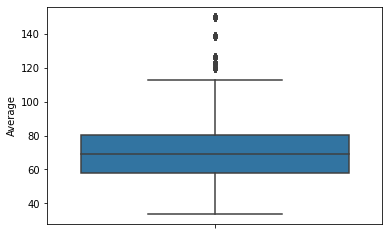

In [ ]:
sns.boxplot(y='Average', data=df_new)

Create df_sectors to include only top 3 sectors by count: IT, Business Services, Finance

In [ ]:
df_sectors = df_new.drop(df_new[(df_new['Sector'] != 'Information Technology') & (df_new['Sector'] != 'Business Services') & (df_new['Sector'] != 'Finance')].index)

df_sectors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 2 to 2251
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1262 non-null   int64  
 1   Job Title          1262 non-null   object 
 2   Salary Estimate    1262 non-null   object 
 3   Job Description    1262 non-null   object 
 4   Rating             1262 non-null   float64
 5   Company Name       1262 non-null   object 
 6   Location           1262 non-null   object 
 7   Headquarters       1262 non-null   object 
 8   Size               1262 non-null   object 
 9   Founded            1262 non-null   int64  
 10  Type of ownership  1262 non-null   object 
 11  Industry           1262 non-null   object 
 12  Sector             1262 non-null   object 
 13  Revenue            1262 non-null   object 
 14  Competitors        1262 non-null   object 
 15  Easy Apply         1262 non-null   object 
 16  Low                1262 

In [ ]:
df_sectors.describe()

,Unnamed: 0,Rating,Founded,Low,High,Average
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000
mean,1178.381933,3.729239,1676.465927,54.347861,90.742472,72.545166
std,661.924153,0.953349,720.690492,19.385081,29.939396,23.882019
min,2.000000,-1.000000,-1.000000,24.000000,38.000000,33.500000
25%,585.250000,3.400000,1954.000000,41.000000,70.000000,59.000000
50%,1220.500000,3.800000,1996.000000,50.000000,87.000000,68.500000
75%,1756.250000,4.200000,2005.000000,63.000000,104.000000,80.500000
max,2251.000000,5.000000,2019.000000,113.000000,190.000000,150.000000


Create DataFrames for IT, Finance, Business Services

In [ ]:
df_it = (df_sectors['Sector'] == 'Information Technology')
df_it = df_sectors.iloc[df_it.values]

df_fin = (df_sectors['Sector'] == 'Finance')
df_fin = df_sectors.iloc[df_fin.values]

df_bs = (df_sectors['Sector'] == 'Business Services')
df_bs = df_sectors.iloc[df_bs.values]

print(df_it.shape[0])
print(df_fin.shape[0])
print(df_bs.shape[0])

570
169
523


**Visually Explore Distribution and Average Salaries of Top 3 Sectors**

Information Technology Average Salaries Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


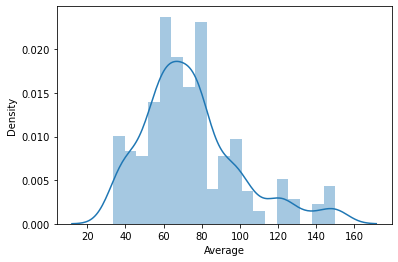

In [ ]:
sns.distplot(df_it['Average'])

Finance Average Salaries Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


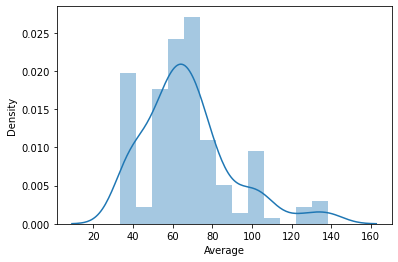

In [ ]:
sns.distplot(df_fin['Average'])

Business Services Salaries Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


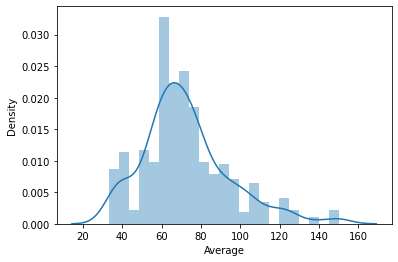

In [ ]:
sns.distplot(df_bs['Average'])

Top 3 Sectors appear to have normal distribution

Average Salaries of Top 3 Sectors

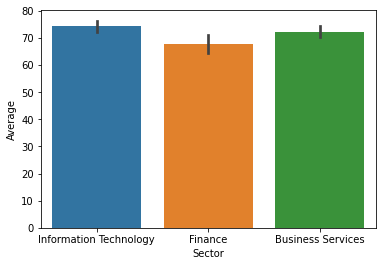

In [ ]:
sns.barplot(x='Sector', y='Average', data=df_sectors)

**Perform T-Test on Average Salaries: Information Technology vs Business Services**

*Test supports no significant difference between average salaries as p=0.1720*

With 95% confidence, the average salaries of Information Technology data analyst jobs are **856.71 USD lower to 4,804.60 USD higher** than the average salaries of Business Services data analyst jobs.

In [ ]:
print("T-Tests on Average Salaries: Information Technology vs. Business Services")
print(stats.ttest_ind(df_it['Average'],df_bs['Average'],equal_var=False))

T-Tests on Average Salaries: Information Technology vs. Business Services
Ttest_indResult(statistic=1.3667973882587918, pvalue=0.17197118030463596)


In [ ]:
mean_difference1 = df_it['Average'].mean() - df_bs['Average'].mean()
print('Mean Difference: ', mean_difference1)
standard_error1 = math.sqrt((df_it['Average'].var()/df_it.shape[0]) + (df_bs['Average'].var()/df_bs.shape[0]))
print('Standard Error: ', standard_error1)
margin_error1 = 1.96*standard_error1
print('Margin of Error: ', margin_error1)
ci_lower1 = mean_difference1 - margin_error1
print('Confidence Interval Lower: ', ci_lower1)
ci_upper1 = mean_difference1 + margin_error1
print('Confidence Interval Lower: ', ci_upper1)

Mean Difference:  1.9739458589111365
Standard Error:  1.444212489625701
Margin of Error:  2.8306564796663736
Confidence Interval Lower:  -0.8567106207552371
Confidence Interval Lower:  4.80460233857751


**Perform T-Test on Average Salaries: Information Technology vs Finance**

*Test supports a significant difference between average salaries as p=0.0013*

With 95% confidence, the average salaries of Information Technology data analyst jobs are **2,609.37 USD to 10,595.42 USD higher** than the average salaries of Finance data analyst jobs.

In [ ]:
print("T-Tests on Average Salaries: Information Technology vs. Finance")
print(stats.ttest_ind(df_it['Average'],df_fin['Average'],equal_var=False))

T-Tests on Average Salaries: Information Technology vs. Finance
Ttest_indResult(statistic=3.240827782237194, pvalue=0.0013228051186464033)


In [ ]:
mean_difference2 = df_it['Average'].mean() - df_fin['Average'].mean()
print('Mean Difference: ', mean_difference2)
standard_error2 = math.sqrt((df_it['Average'].var()/df_it.shape[0]) + (df_fin['Average'].var()/df_fin.shape[0]))
print('Standard Error: ', standard_error2)
margin_error2 = 1.96*standard_error2
print('Margin of Error: ', margin_error2)
ci_lower2 = mean_difference2 - margin_error2
print('Confidence Interval Lower: ', ci_lower2)
ci_upper2 = mean_difference2 + margin_error2
print('Confidence Interval Lower: ', ci_upper2)

Mean Difference:  6.602398006851445
Standard Error:  2.037256667274589
Margin of Error:  3.9930230678581946
Confidence Interval Lower:  2.60937493899325
Confidence Interval Lower:  10.59542107470964


**Perform T-Test on Average Salaries: Business Services vs Finance**

*Test supports a significant difference between average salaries as p=0.019*

With 95% confidence, the average salaries of Business Services data analyst jobs are **732.61 USD to 8,524.29 USD higher** than the average salaries of Finance data analyst jobs.

In [ ]:
print("T-Tests on Average Salaries: Business Services vs. Finance")
print(stats.ttest_ind(df_bs['Average'],df_fin['Average'], equal_var=False))

T-Tests on Average Salaries: Business Services vs. Finance
Ttest_indResult(statistic=2.328577582858246, pvalue=0.020590957646009066)


In [ ]:
mean_difference3 = df_bs['Average'].mean() - df_fin['Average'].mean()
print('Mean Difference: ', mean_difference1)
standard_error3 = math.sqrt((df_bs['Average'].var()/df_bs.shape[0]) + (df_fin['Average'].var()/df_fin.shape[0]))
print('Standard Error: ', standard_error3)
margin_error3 = 1.96*standard_error3
print('Margin of Error: ', margin_error3)
ci_lower3 = mean_difference3 - margin_error3
print('Confidence Interval Lower: ', ci_lower3)
ci_upper3 = mean_difference3 + margin_error3
print('Confidence Interval Lower: ', ci_upper3)

Mean Difference:  1.9739458589111365
Standard Error:  1.9876735832263088
Margin of Error:  3.895840223123565
Confidence Interval Lower:  0.7326119248167431
Confidence Interval Lower:  8.524292371063874


In [ ]:
print('Information Technology Average & Median Salaries (k USD): ', df_it['Average'].mean()," , ", df_it['Average'].median())
print('Business Service Average & Median Salaries (k USD): ', df_bs['Average'].mean()," , ", df_bs['Average'].median())
print('Finance Average & Median Salaries (k USD): ', df_fin['Average'].mean()," , ", df_fin['Average'].median())

Information Technology Average & Median Salaries (k USD):  74.24736842105263  ,  70.0
Business Service Average & Median Salaries (k USD):  72.27342256214149  ,  68.5
Finance Average & Median Salaries (k USD):  67.64497041420118  ,  63.5


**Summary of Analysis and Recommendations:**

The average and median data analyst salaries for the most popular sectors are as follows, respectively:

*   IT - 74,247 USD / 70,000 USD

*   Business Services - 72,273 USD / 68,500 USD

*   Finance - 67,644 USD / 63,500 USD

Hypotheses for T-Tests:
1.	Hypothesis was ***incorrect***. Test supports no significant difference between average salaries of IT and Business Services DA jobs. With 95% confidence, the average salaries of Information Technology data analyst jobs are **856.71 USD lower to 4,804.60 USD higher** than the average salaries of Business Services data analyst jobs.
2.	Hypothesis was ***correct***. Test supports a significant difference between average salaries of IT and Finance DA jobs. With 95% confidence, the average salaries of Information Technology data analyst jobs are **2,609.37 USD to 10,595.42 USD higher** than the average salaries of Finance data analyst jobs.
3.	Hypothesis was ***correct***. Test supports a significant difference between average salaries of Business Services and Finance DA jobs. With 95% confidence, the average salaries of Business Services data analyst jobs are **732.61 USD to 8,524.29 USD higher** than the average salaries of Finance data analyst jobs.

**Based on the findings above, individuals interested in pursuing the highest data analyst salaries in these sectors will apply to job openings in this priority: IT, Business Services, and Finance.**